In [1]:
import os
os.chdir('../')

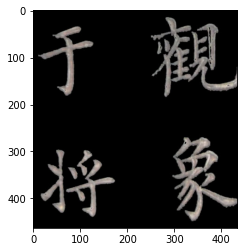

In [1]:
# 导入 opencv-python
import cv2

# 导入可视化工具包 matplotlib，并让绘制的图像嵌入在 notebook 中
import matplotlib.pyplot as plt
%matplotlib inline

# 定义可视化图像函数，输入图像路径，可视化图像
def show_img_from_path(img_path):
    """opencv 读入图像，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来"""
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

# 定义可视化图像函数，输入图像 array，可视化图像
def show_img_from_array(img):
    """输入 array，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来"""
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()
    
show_img_from_path('../../../data/icdar2015/imgs/training\\a209.jpg')

In [3]:
from mmcv import Config
from mmdet.apis import set_random_seed

cfg = Config.fromfile('./configs/textdet/maskrcnn/mask_rcnn_r50_fpn_160e_icdar2017-stone.py')

# 存放输出结果和日志的目录
cfg.work_dir = './demo/det'

# 初始学习率 0.001 是针对 8 个 GPU 训练的
# 如果只有一个 GPU，则除以8
cfg.optimizer.lr = 0.001 / 8
cfg.lr_config.warmup = None

# 每训练40张图像，记录一次日志
cfg.log_config.interval = 40

# 设置随机数种子
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

print(cfg.pretty_text)

checkpoint_config = dict(interval=10)
log_config = dict(interval=40, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
model = dict(
    type='OCRMaskRCNN',
    backbone=dict(
        type='mmdet.ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50'),
        norm_eval=True,
        style='pytorch'),
    neck=dict(
        type='mmdet.FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[4],
            ratios=[0.17, 0.44, 1.13, 2.9, 7

In [4]:
import mmcv
from mmocr.datasets import build_dataset
from mmocr.models import build_detector
from mmocr.apis import train_detector
import os.path as osp

# 建立数据集
datasets = [build_dataset(cfg.data.train)]

# 建立模型
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

# 创建新目录，保存训练结果
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))

train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


D:\workspace\mmocr\Chinese_inscription_ocr\mmocr\apis\train.py:84: UserWarning: config is now expected to have a `runner` section, please set `runner` in your config.
  warnings.warn(
2022-04-26 19:35:11,609 - mmocr - INFO - Start running, host: weixinyao@wxy-r7000p, work_dir: D:\workspace\mmocr\Chinese_inscription_ocr\demo\det
2022-04-26 19:35:11,609 - mmocr - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(NORMAL      ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook   

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


IndexError: Caught IndexError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\_utils\worker.py", line 287, in _worker_loop
    data = fetcher.fetch(index)
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\_utils\fetch.py", line 49, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\_utils\fetch.py", line 49, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\dataset.py", line 308, in __getitem__
    return self.datasets[dataset_idx][sample_idx]
  File "C:\ProgramData\Anaconda3\lib\site-packages\mmdet\datasets\custom.py", line 218, in __getitem__
    data = self.prepare_train_img(idx)
  File "C:\ProgramData\Anaconda3\lib\site-packages\mmdet\datasets\custom.py", line 241, in prepare_train_img
    return self.pipeline(results)
  File "C:\ProgramData\Anaconda3\lib\site-packages\mmdet\datasets\pipelines\compose.py", line 41, in __call__
    data = t(data)
  File "C:\ProgramData\Anaconda3\lib\site-packages\mmdet\datasets\pipelines\loading.py", line 395, in __call__
    results = self._load_masks(results)
  File "C:\ProgramData\Anaconda3\lib\site-packages\mmdet\datasets\pipelines\loading.py", line 347, in _load_masks
    [self._poly2mask(mask, h, w) for mask in gt_masks], h, w)
  File "C:\ProgramData\Anaconda3\lib\site-packages\mmdet\datasets\pipelines\loading.py", line 347, in <listcomp>
    [self._poly2mask(mask, h, w) for mask in gt_masks], h, w)
  File "C:\ProgramData\Anaconda3\lib\site-packages\mmdet\datasets\pipelines\loading.py", line 303, in _poly2mask
    rles = maskUtils.frPyObjects(mask_ann, img_h, img_w)
  File "pycocotools/_mask.pyx", line 293, in pycocotools._mask.frPyObjects
IndexError: list index out of range
